SLEEP HEALTH DATASET FEATURE IMPORTANCE ANALYSIS
TARGET VARIABLE: Quality of Sleep

Dataset Overview:
Shape: (374, 13)
Columns: ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder', 'bp_category']
Missing values per column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
bp_category                  0
dtype: int64

Target Variable (Quality of Sleep) Distribution:
Quality of Sleep
4      5
5      7
6    105
7     77
8    109
9     71
Name: count, dtype: int64
Total samples: 374
Missing values in Quality of Sleep: 0

Quality of Sleep is 

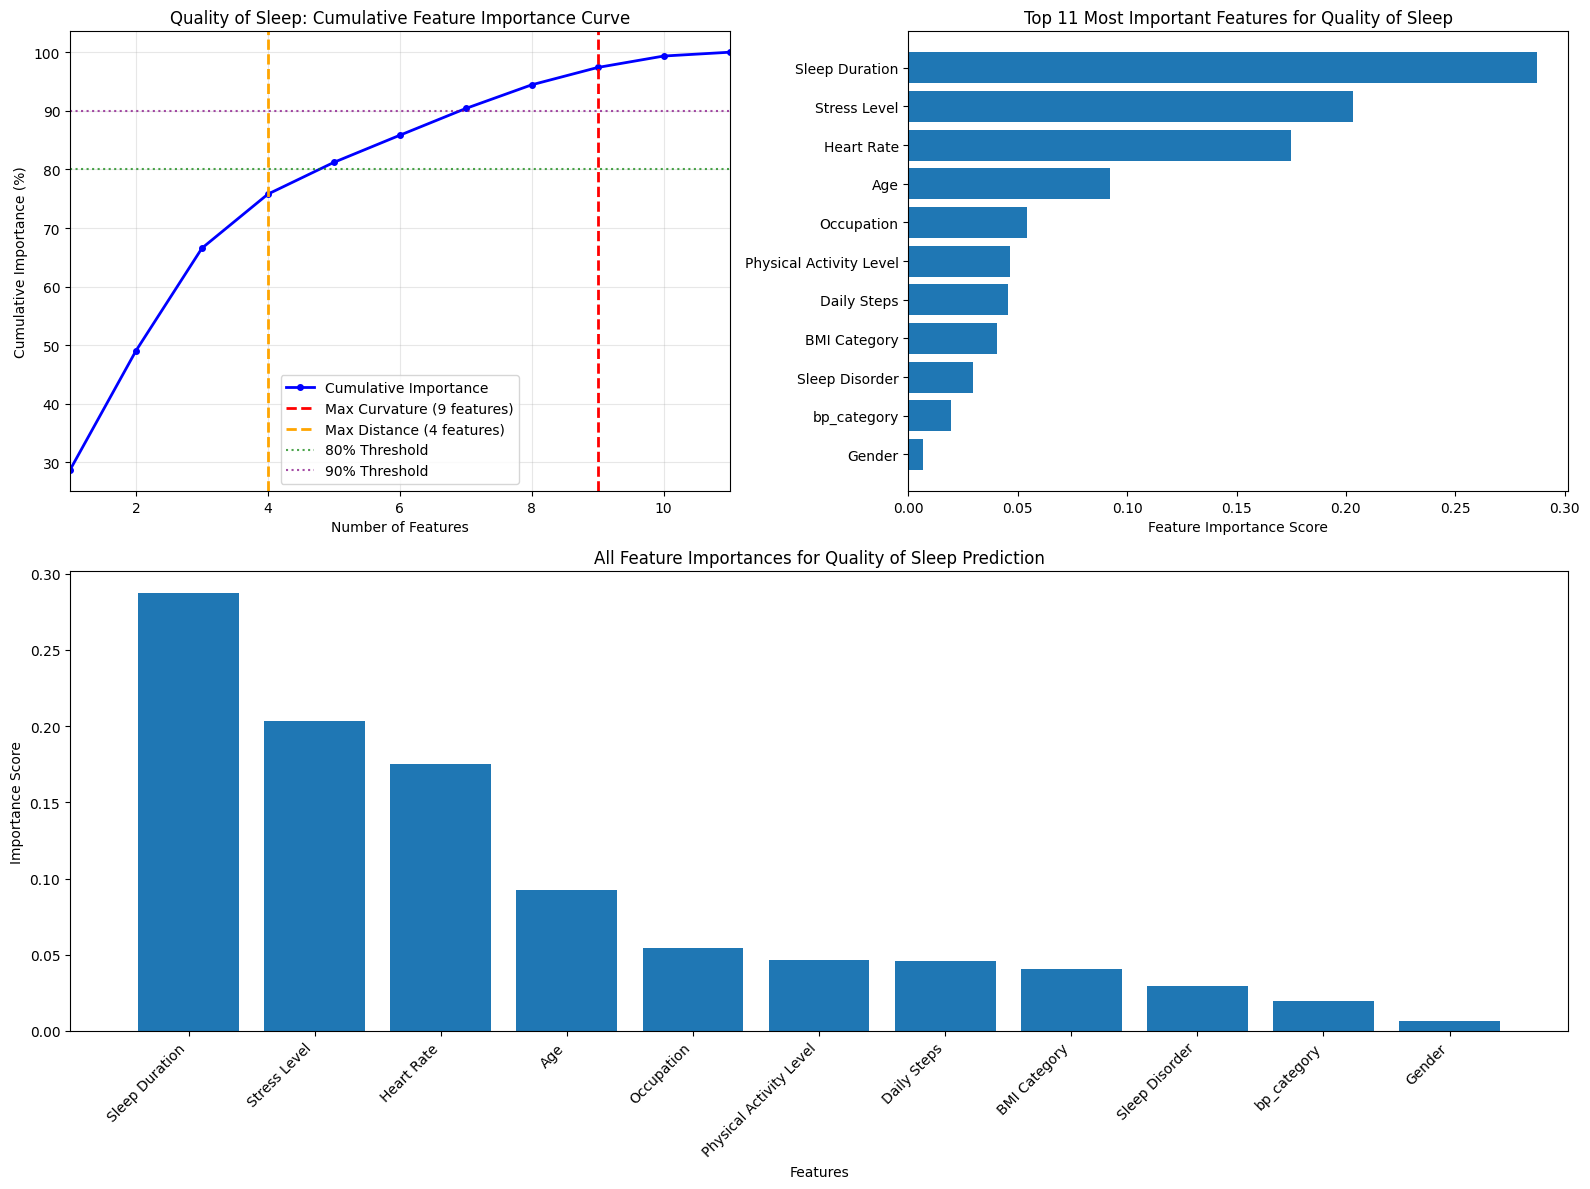


RECOMMENDED FEATURE SUBSETS FOR QUALITY OF SLEEP PREDICTION

1. MINIMAL SET (Elbow Point - Method 1):
   Number of Features: 9
   Cumulative Importance: 97.40%
   Features:
    1. Sleep Duration            (Score: 0.2872)
    2. Stress Level              (Score: 0.2034)
    3. Heart Rate                (Score: 0.1750)
    4. Age                       (Score: 0.0922)
    5. Occupation                (Score: 0.0542)
    6. Physical Activity Level   (Score: 0.0463)
    7. Daily Steps               (Score: 0.0457)
    8. BMI Category              (Score: 0.0404)
    9. Sleep Disorder            (Score: 0.0296)

2. BALANCED SET (80% Cumulative Importance):
   Number of Features: 5
   Cumulative Importance: 81.20%
   Features:
    1. Sleep Duration            (Score: 0.2872)
    2. Stress Level              (Score: 0.2034)
    3. Heart Rate                (Score: 0.1750)
    4. Age                       (Score: 0.0922)
    5. Occupation                (Score: 0.0542)

3. COMPREHENSIVE SET (

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Read sleep health data
df_sleep = pd.read_csv('https://raw.githubusercontent.com/Salina-Huang/Programming-for-AI-Sleep-Health-and-Lifestyle-Model/refs/heads/main/cleaned_data_sleep.csv')

print("SLEEP HEALTH DATASET FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)
print("TARGET VARIABLE: Quality of Sleep")
print("=" * 70)

# Display basic dataset information
print("\nDataset Overview:")
print(f"Shape: {df_sleep.shape}")
print(f"Columns: {list(df_sleep.columns)}")
print(f"Missing values per column:")
print(df_sleep.isnull().sum())

# Check target variable distribution
print("\nTarget Variable (Quality of Sleep) Distribution:")
print(df_sleep['Quality of Sleep'].value_counts().sort_index())
print(f"Total samples: {len(df_sleep)}")
print(f"Missing values in Quality of Sleep: {df_sleep['Quality of Sleep'].isnull().sum()}")

# Prepare data for analysis
df_sleep_clean = df_sleep.copy()

# Check if Quality of Sleep needs encoding (if it's categorical)
if df_sleep_clean['Quality of Sleep'].dtype == 'object':
    print("\nQuality of Sleep is categorical. Encoding...")
    le_target = LabelEncoder()
    df_sleep_clean['Quality of Sleep'] = le_target.fit_transform(df_sleep_clean['Quality of Sleep'])
    print(f"Encoded classes: {le_target.classes_}")
else:
    # If it's numerical, convert to categorical for classification
    print("\nQuality of Sleep is numerical. Converting to categorical...")
    # Create bins for quality of sleep scores
    bins = [0, 5, 7, 10]  # Poor: 0-5, Average: 6-7, Good: 8-10
    labels = ['Poor', 'Average', 'Good']
    df_sleep_clean['Quality of Sleep_Category'] = pd.cut(df_sleep_clean['Quality of Sleep'], bins=bins, labels=labels)

    le_target = LabelEncoder()
    df_sleep_clean['Quality of Sleep_Encoded'] = le_target.fit_transform(df_sleep_clean['Quality of Sleep_Category'])
    print(f"Created categories: {le_target.classes_}")

# Prepare features and target
X_sleep = df_sleep_clean.drop(['Quality of Sleep', 'Person ID'], axis=1, errors='ignore')
# Also drop the categorical version if created
X_sleep = X_sleep.drop(['Quality of Sleep_Category', 'Quality of Sleep_Encoded'], axis=1, errors='ignore')

# Set target variable
if 'Quality of Sleep_Encoded' in df_sleep_clean.columns:
    y_sleep = df_sleep_clean['Quality of Sleep_Encoded']
else:
    y_sleep = df_sleep_clean['Quality of Sleep']

print(f"\nFeatures shape: {X_sleep.shape}")
print(f"Target shape: {y_sleep.shape}")
print(f"Target classes: {np.unique(y_sleep)}")

# Encode categorical variables
categorical_cols = X_sleep.select_dtypes(include=['object']).columns
print(f"\nCategorical columns to encode: {list(categorical_cols)}")

# Create a dictionary to store label encoders for reference
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_sleep[col] = le.fit_transform(X_sleep[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {le.classes_}")

# Split data for training and validation
X_train, X_test, y_train, y_test = train_test_split(
    X_sleep, y_sleep, test_size=0.2, random_state=42, stratify=y_sleep
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Train Random Forest model
rf_sleep = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_sleep.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_sleep.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("\n" + "=" * 70)
print("MODEL PERFORMANCE")
print("=" * 70)
print(f"Accuracy: {accuracy:.4f}")

# Get target class names
if hasattr(le_target, 'classes_'):
    target_names = le_target.classes_
else:
    target_names = ['Class ' + str(i) for i in np.unique(y_sleep)]

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Get feature importances
importances_sleep = rf_sleep.feature_importances_
feature_importances_sleep = pd.DataFrame({
    'feature': X_sleep.columns,
    'score': importances_sleep
})
feature_importances_sleep = feature_importances_sleep.sort_values(
    by='score', ascending=False
).reset_index(drop=True)

# Calculate cumulative importance
feature_importances_sleep['cumulative_score'] = feature_importances_sleep['score'].cumsum()
feature_importances_sleep['percentage'] = feature_importances_sleep['cumulative_score'] * 100

print("\n" + "=" * 70)
print("FEATURE IMPORTANCE RANKING")
print("=" * 70)
print(feature_importances_sleep.to_string())

# Elbow point detection functions
def find_elbow_point(feature_importances):
    """Find elbow point by calculating curvature"""
    x = np.arange(len(feature_importances))
    y = feature_importances['percentage'].values

    # Calculate first derivative (slope)
    first_deriv = np.gradient(y, x)

    # Calculate second derivative (curvature)
    second_deriv = np.gradient(first_deriv, x)

    # Calculate curvature
    curvature = np.abs(second_deriv) / (1 + first_deriv**2)**1.5

    # Find point with maximum curvature (excluding first 2 and last 2 points)
    elbow_idx = np.argmax(curvature[2:-2]) + 2

    return elbow_idx

def find_elbow_by_angle(feature_importances):
    """Find elbow point by calculating angle change"""
    x = np.arange(len(feature_importances))
    y = feature_importances['percentage'].values

    # Create line from first point to last point
    line_start = np.array([x[0], y[0]])
    line_end = np.array([x[-1], y[-1]])
    line_vec = line_end - line_start
    line_len = np.linalg.norm(line_vec)

    # Calculate distance from each point to this line
    distances = []
    for i in range(len(x)):
        point_vec = np.array([x[i], y[i]]) - line_start
        # Projection length
        projection = np.dot(point_vec, line_vec) / line_len
        # Perpendicular distance
        distance = np.sqrt(np.dot(point_vec, point_vec) - projection**2)
        distances.append(distance)

    elbow_idx = np.argmax(distances)
    return elbow_idx

# Find elbow points
elbow_idx1 = find_elbow_point(feature_importances_sleep)
elbow_idx2 = find_elbow_by_angle(feature_importances_sleep)

print("\n" + "=" * 70)
print("ELBOW POINT ANALYSIS")
print("=" * 70)

print("\nMethod 1 - Maximum Curvature:")
print(f"  Position: {elbow_idx1 + 1}th feature")
print(f"  Feature Name: {feature_importances_sleep.loc[elbow_idx1, 'feature']}")
print(f"  Importance Score: {feature_importances_sleep.loc[elbow_idx1, 'score']:.4f}")
print(f"  Cumulative Importance: {feature_importances_sleep.loc[elbow_idx1, 'percentage']:.2f}%")
print(f"  Number of Features: {elbow_idx1 + 1}")

print("\nMethod 2 - Maximum Distance:")
print(f"  Position: {elbow_idx2 + 1}th feature")
print(f"  Feature Name: {feature_importances_sleep.loc[elbow_idx2, 'feature']}")
print(f"  Importance Score: {feature_importances_sleep.loc[elbow_idx2, 'score']:.4f}")
print(f"  Cumulative Importance: {feature_importances_sleep.loc[elbow_idx2, 'percentage']:.2f}%")
print(f"  Number of Features: {elbow_idx2 + 1}")

# Display detailed comparison for key feature counts
print("\n" + "=" * 70)
print("DETAILED COMPARISON FOR KEY FEATURE COUNTS")
print("=" * 70)
print("\nNo. Features | Cumulative % | Last Feature in Set")
print("-" * 60)

feature_counts = [3, 4, 5, 6, elbow_idx1 + 1, elbow_idx2 + 1]
feature_counts = sorted(set([fc for fc in feature_counts if fc <= len(feature_importances_sleep)]))

for n in feature_counts:
    importance = feature_importances_sleep.loc[n-1, 'percentage']
    feature_name = feature_importances_sleep.loc[n-1, 'feature']
    print(f"{n:^12} | {importance:^12.2f}% | {feature_name}")

# Plot results
plt.figure(figsize=(16, 12))

# 1. Cumulative importance curve
plt.subplot(2, 2, 1)
x_values = range(1, len(feature_importances_sleep) + 1)
plt.plot(x_values, feature_importances_sleep['percentage'],
         'b-', marker='o', linewidth=2, markersize=4, label='Cumulative Importance')

# Mark elbow points
plt.axvline(x=elbow_idx1 + 1, color='red', linestyle='--', linewidth=2,
           label=f'Max Curvature ({elbow_idx1 + 1} features)')
plt.axvline(x=elbow_idx2 + 1, color='orange', linestyle='--', linewidth=2,
           label=f'Max Distance ({elbow_idx2 + 1} features)')

# Mark 80% and 90% thresholds
plt.axhline(y=80, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label='80% Threshold')
plt.axhline(y=90, color='purple', linestyle=':', linewidth=1.5, alpha=0.7, label='90% Threshold')

plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance (%)')
plt.title('Quality of Sleep: Cumulative Feature Importance Curve')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(1, len(feature_importances_sleep))

# 2. Top feature importances (bar chart)
plt.subplot(2, 2, 2)
top_n = min(15, len(feature_importances_sleep))
plt.barh(range(top_n), feature_importances_sleep['score'].head(top_n)[::-1])
plt.yticks(range(top_n), feature_importances_sleep['feature'].head(top_n)[::-1])
plt.xlabel('Feature Importance Score')
plt.title(f'Top {top_n} Most Important Features for Quality of Sleep')
plt.tight_layout()

# 3. Individual feature importances (all features)
plt.subplot(2, 1, 2)
all_features = len(feature_importances_sleep)
plt.bar(range(all_features), feature_importances_sleep['score'])
plt.xticks(range(all_features), feature_importances_sleep['feature'], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('All Feature Importances for Quality of Sleep Prediction')
plt.tight_layout()

plt.show()

# Display recommended feature subsets
print("\n" + "=" * 70)
print("RECOMMENDED FEATURE SUBSETS FOR QUALITY OF SLEEP PREDICTION")
print("=" * 70)

# Find features that reach 80% and 90% cumulative importance
idx_80 = np.where(feature_importances_sleep['percentage'] >= 80)[0]
idx_90 = np.where(feature_importances_sleep['percentage'] >= 90)[0]

num_features_80 = idx_80[0] + 1 if len(idx_80) > 0 else len(feature_importances_sleep)
num_features_90 = idx_90[0] + 1 if len(idx_90) > 0 else len(feature_importances_sleep)

print(f"\n1. MINIMAL SET (Elbow Point - Method 1):")
print(f"   Number of Features: {elbow_idx1 + 1}")
print(f"   Cumulative Importance: {feature_importances_sleep.loc[elbow_idx1, 'percentage']:.2f}%")
print("   Features:")
for i in range(elbow_idx1 + 1):
    feature = feature_importances_sleep.loc[i, 'feature']
    score = feature_importances_sleep.loc[i, 'score']
    print(f"   {i+1:2d}. {feature:<25} (Score: {score:.4f})")

print(f"\n2. BALANCED SET (80% Cumulative Importance):")
print(f"   Number of Features: {num_features_80}")
print(f"   Cumulative Importance: {feature_importances_sleep.loc[num_features_80-1, 'percentage']:.2f}%")
print("   Features:")
for i in range(num_features_80):
    feature = feature_importances_sleep.loc[i, 'feature']
    score = feature_importances_sleep.loc[i, 'score']
    print(f"   {i+1:2d}. {feature:<25} (Score: {score:.4f})")

print(f"\n3. COMPREHENSIVE SET (90% Cumulative Importance):")
print(f"   Number of Features: {num_features_90}")
print(f"   Cumulative Importance: {feature_importances_sleep.loc[num_features_90-1, 'percentage']:.2f}%")
print("   Features:")
for i in range(num_features_90):
    feature = feature_importances_sleep.loc[i, 'feature']
    score = feature_importances_sleep.loc[i, 'score']
    print(f"   {i+1:2d}. {feature:<25} (Score: {score:.4f})")

print(f"\n4. FULL SET (All Features):")
print(f"   Number of Features: {len(feature_importances_sleep)}")
print(f"   Cumulative Importance: {feature_importances_sleep.loc[len(feature_importances_sleep)-1, 'percentage']:.2f}%")

# Model performance summary
print("\n" + "=" * 70)
print("MODEL AND DATASET SUMMARY")
print("=" * 70)

print(f"Total Samples: {len(df_sleep_clean)}")
print(f"Target Classes: {target_names}")
print(f"Class Distribution:")
if hasattr(le_target, 'classes_'):
    for i, cls in enumerate(le_target.classes_):
        count = (y_sleep == i).sum()
        percentage = count / len(y_sleep) * 100
        print(f"  {cls}: {count} samples ({percentage:.1f}%)")
else:
    unique_classes, class_counts = np.unique(y_sleep, return_counts=True)
    for cls, count in zip(unique_classes, class_counts):
        percentage = count / len(y_sleep) * 100
        print(f"  Class {cls}: {count} samples ({percentage:.1f}%)")

print(f"\nTotal Features Available: {len(X_sleep.columns)}")
print(f"\nTop 5 Most Important Features for Quality of Sleep Prediction:")
for i in range(min(5, len(feature_importances_sleep))):
    feature = feature_importances_sleep.loc[i, 'feature']
    score = feature_importances_sleep.loc[i, 'score']
    percentage = feature_importances_sleep.loc[i, 'percentage']
    print(f"  {i+1}. {feature:<25} Importance: {score:.4f} (Cumulative: {percentage:.1f}%)")

print(f"\nBottom 5 Least Important Features:")
for i in range(len(feature_importances_sleep)-5, len(feature_importances_sleep)):
    feature = feature_importances_sleep.loc[i, 'feature']
    score = feature_importances_sleep.loc[i, 'score']
    print(f"  {i+1}. {feature:<25} Importance: {score:.4f}")

print("\n" + "=" * 70)
print("KEY INSIGHTS FOR QUALITY OF SLEEP PREDICTION")
print("=" * 70)
print("1. The model predicts Quality of Sleep based on lifestyle factors")
print("2. Feature importance analysis helps identify which factors most affect sleep quality")
print("3. Elbow point analysis suggests optimal number of features for efficient prediction")
print("4. Results can guide targeted interventions to improve sleep quality")